In [1]:
import torch
import os
import json
from PIL import Image
from collections import OrderedDict

In [2]:
label_path = 'dataset/train/label' #라벨링 데이터 사용을 위한 경로 설정
img_path = 'dataset/train/image' # 이미지 데이터 사용을 위한 경로 설정

label_file_list = os.listdir(label_path)
label_file_list.sort()
label_file_size = len(label_file_list)

img_file_list = os.listdir(img_path)
img_file_list.sort()
img_file_size = len(img_file_list)
print("파일 사이즈 : " + f'{img_file_size}')

파일 사이즈 : 25158


In [3]:
 #-*- coding: utf-8 -*-
def make_label_and_train_list():  
    
    train_img_list = [0 for i in range(label_file_size)]
    label_list = [0 for i in range(label_file_size)] 
    
    for i in range(label_file_size):
        
        train_img_list[i] = img_path +'/'+ img_file_list[i]
        
        with open(label_path +'/'+ label_file_list[i], "r", encoding = 'UTF8') as st_json:
                    load_data = json.load(st_json)

        class_no = load_data['labeled_data'][0]['class_no']

        if class_no == '5':
            label_list[i] = 0 # 발신기
        elif class_no =='13':
            label_list[i] = 1 # 비상조명등
        elif class_no == '0':
            label_list[i] = 2 # 소형소화기
        elif class_no =='2':
            label_list[i] = 3 # 소화전함체
        elif class_no =='3':
            label_list[i] = 4 # 스프링클러(간이)헤드
        elif class_no =='8':
            label_list[i] = 5 # 시각경보장치
        elif class_no =='15':
            label_list[i] = 6 # 연결송수관설비
        elif class_no =='6':
            label_list[i] = 7 # 위치표시등
        elif class_no =='11':
            label_list[i] = 8 # 유도기구
        elif class_no == '4':
            label_list[i] = 9 # 음향장치
        else:
            print("another class : " + class_no)
           
    return train_img_list, label_list

In [4]:
val_label_path = 'dataset/val/label' #라벨링 데이터 사용을 위한 경로 설정
val_img_path = 'dataset/val/image' # 이미지 데이터 사용을 위한 경로 설정

val_label_file_list = os.listdir(val_label_path)
val_label_file_list.sort()
val_label_file_size = len(val_label_file_list)

val_img_file_list = os.listdir(val_img_path)
val_img_file_list.sort()
val_img_file_size = len(val_img_file_list)

def make_label_and_val_list():
    val_img_list = [0 for i in range(val_label_file_size)]
    val_label_list = [0 for i in range(val_label_file_size)] 

    #for i in file_list_test:
    for i in range(val_label_file_size):
    
        val_img_list[i] = val_img_path +'/'+ val_img_file_list[i]
        
        with open(val_label_path +'/'+ val_label_file_list[i], "r", encoding = 'UTF8') as st_json:
                    load_data = json.load(st_json)

        class_no = load_data['labeled_data'][0]['class_no']

        if class_no == '5':
            val_label_list[i] = 0 # 발신기
        elif class_no =='13':
            val_label_list[i] = 1 # 비상조명등
        elif class_no == '0':
            val_label_list[i] = 2 # 소형소화기
        elif class_no =='2':
            val_label_list[i] = 3 # 소화전함체
        elif class_no =='3':
            val_label_list[i] = 4 # 스프링클러(간이)헤드
        elif class_no =='8':
            val_label_list[i] = 5 # 시각경보장치
        elif class_no =='15':
            val_label_list[i] = 6 # 연결송수관설비
        elif class_no =='6':
            val_label_list[i] = 7 # 위치표시등
        elif class_no =='11':
            val_label_list[i] = 8 # 유도기구
        elif class_no == '4':
            val_label_list[i] = 9 # 음향장치
        else:
            print("another class : " + class_no)
           
    return val_img_list,  val_label_list

In [5]:
train_img_list, label_list = make_label_and_train_list()
val_img_list, val_label_list = make_label_and_val_list()

In [6]:
class ImageTransform():

    def __init__(self):
        
        self.data_transform = transforms.Compose([
            #transforms.CenterCrop(720),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
        ])
        

    def __call__(self, img):
        return self.data_transform(img)

In [7]:
from torch.utils import data

class Img_Dataset(data.Dataset):

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        img_label = label_list[index]

        return img_transformed,img_label
    
    
    
    
class Img_Dataset_for_val(data.Dataset):

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        img_label = val_label_list[index]

        return img_transformed,img_label

In [8]:
import torchvision.transforms as transforms 

train_dataset = Img_Dataset(file_list=train_img_list,
                            transform=ImageTransform())

val_dataset = Img_Dataset_for_val(file_list=val_img_list, transform=ImageTransform())

In [9]:
train_dataloader = data.DataLoader(train_dataset,
                                   batch_size=32,
                                   shuffle=True,
                                   drop_last=True)

val_dataloader = data.DataLoader(val_dataset,
                                   batch_size=32,
                                   shuffle=False,
                                   drop_last=True)

In [10]:
batch_iterator = iter(train_dataloader)
images = next(batch_iterator)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [12]:
import torch.nn as nn

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        self.shortcut = nn.Sequential()
        self.relu = nn.LeakyReLU(0.2)
        
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x


class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*BottleNeck.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*BottleNeck.expansion)
            )
            
    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x
        

In [13]:

class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=5, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])

def resnet101():
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])
    

In [14]:
class VGG11(nn.Module):
    def __init__(self,init_weights: bool = True):
        super(VGG11, self).__init__()
        self.convnet = nn.Sequential(
            # Input Channel (RGB: 3)
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 
        )

        self.fclayer = nn.Sequential(
            nn.Linear(512 * 8 * 8, 4096),
            nn.LeakyReLU(0.2),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.LeakyReLU(0.2),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 10),
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.convnet(x)
        x = torch.flatten(x, 1)
        x = self.fclayer(x)
        return x

In [15]:
#from torchsummary import summary as summary_
#model = resnet18().to(device)
model = VGG11().to(device)
#summary_(model,(3,256,256),batch_size = 128)

In [16]:
criterion = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [24]:
total_batch = len(train_dataloader)
val_total_batch = len(val_dataloader)
epochs = 10
x_values = []
train_loss = []
test_loss = []
cnt = 0

for epoch in range(epochs): 
    avg_cost = 0 
    cnt = 0
    val_avg_cost = 0
    
    for X, Y in train_dataloader: 
        X = X.to(device) 
        Y = Y.to(device) 
        
        optimizer.zero_grad() 
        hypothesis = model(X) 
        cost = criterion(hypothesis, Y) 
        cost.backward() 
        optimizer.step() 
       
        avg_cost += cost / total_batch
        cnt += 1
        
        if cnt % 300 == 1 and cnt != 1:
            print('[Epoch: {:>4}] now = {:>9} / 786 '.format(epoch + 1, cnt))
        
    with torch.no_grad():
        for A, B in val_dataloader:
            A = A.to(device)
            B = B.to(device)
            val_output = model(A)
            val_loss = criterion(val_output,B)
            val_avg_cost += val_loss / val_total_batch

    x_values.append(epoch+1)
    train_loss.append(avg_cost)
    test_loss.append(val_avg_cost)
    #torch.save(model.state_dict(), 'model'+f'{epoch+1}'+'.pt')
 
    print('[Epoch: {:>4}] loss = {:>.9}   test_loss = {:>.9}'.format(epoch + 1, avg_cost, val_avg_cost))

[Epoch:    1] now =       301 / 786 
[Epoch:    1] now =       601 / 786 
[Epoch:    1] loss = 0.683345258   test_loss = 0.872057021
[Epoch:    2] now =       301 / 786 
[Epoch:    2] now =       601 / 786 
[Epoch:    2] loss = 0.292777628   test_loss = 0.613072395
[Epoch:    3] now =       301 / 786 
[Epoch:    3] now =       601 / 786 
[Epoch:    3] loss = 0.169804096   test_loss = 0.620947957
[Epoch:    4] now =       301 / 786 
[Epoch:    4] now =       601 / 786 
[Epoch:    4] loss = 0.112780437   test_loss = 0.734118164
[Epoch:    5] now =       301 / 786 
[Epoch:    5] now =       601 / 786 
[Epoch:    5] loss = 0.0780007914   test_loss = 0.468777657
[Epoch:    6] now =       301 / 786 
[Epoch:    6] now =       601 / 786 
[Epoch:    6] loss = 0.0658989176   test_loss = 0.633090556
[Epoch:    7] now =       301 / 786 
[Epoch:    7] now =       601 / 786 
[Epoch:    7] loss = 0.0533107333   test_loss = 0.679329515
[Epoch:    8] now =       301 / 786 
[Epoch:    8] now =       601

In [50]:
train_loss_list = [0 for i in range(10)]
test_loss_list = [0 for i in range(10)]

for i in range(10):
    train_loss_list[i] = train_loss[i].tolist()
    test_loss_list[i] = test_loss[i].tolist()


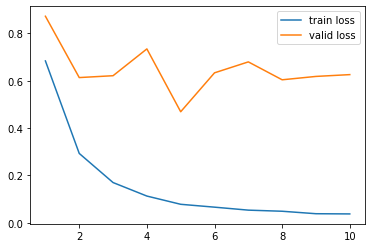

In [51]:
import matplotlib.pyplot as plt
plt.plot(x_values, train_loss_list)
plt.plot(x_values, test_loss_list)
plt.legend(['train loss', 'valid loss'])
plt.show()

In [70]:
test_label_path = 'dataset/test/label' #라벨링 데이터 사용을 위한 경로 설정
test_img_path = 'dataset/test/image' # 이미지 데이터 사용을 위한 경로 설정

test_label_file_list = os.listdir(test_label_path)
test_label_file_list.sort()
test_label_file_size = len(test_label_file_list)

test_img_file_list = os.listdir(test_img_path)
test_img_file_list.sort()
test_img_file_size = len(test_img_file_list)

def make_label_and_test_list():
    test_img_list = [0 for i in range(test_label_file_size)]
    test_label_list = [0 for i in range(test_label_file_size)] 

    #for i in file_list_test:
    for i in range(test_label_file_size):
    
        test_img_list[i] = test_img_path +'/'+ test_img_file_list[i]
        
        with open(test_label_path +'/'+ test_label_file_list[i], "r", encoding = 'UTF8') as st_json:
                    load_data = json.load(st_json)

        class_no = load_data['labeled_data'][0]['class_no']

        if class_no == '5':
            test_label_list[i] = 0 # 발신기
        elif class_no =='13':
            test_label_list[i] = 1 # 비상조명등
        elif class_no == '0':
            test_label_list[i] = 2 # 소형소화기
        elif class_no =='2':
            test_label_list[i] = 3 # 소화전함체
        elif class_no =='3':
            test_label_list[i] = 4 # 스프링클러(간이)헤드
        elif class_no =='8':
            test_label_list[i] = 5 # 시각경보장치
        elif class_no =='15':
            test_label_list[i] = 6 # 연결송수관설비
        elif class_no =='6':
            test_label_list[i] = 7 # 위치표시등
        elif class_no =='11':
            test_label_list[i] = 8 # 유도기구
        elif class_no == '4':
            test_label_list[i] = 9 # 음향장치
        else:
            print("another class : " + class_no)
           
    return test_img_list,  test_label_list


class Img_Dataset_for_test(data.Dataset):

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        img_label = test_label_list[index]

        return img_transformed,img_label

In [71]:
test_img_list, test_label_list = make_label_and_test_list()

In [72]:
test_dataset = Img_Dataset_for_test(file_list=test_img_list, transform=ImageTransform())

test_dataloader = data.DataLoader(test_dataset,
                                   batch_size=32,
                                   shuffle=False,
                                   drop_last=True)

In [73]:
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
arr = [[0]*10 for i in range(10)]
with torch.no_grad():
    #for datas in test_dataloader:
    for datas in test_dataloader:
        images, labels = datas[0].to(device), datas[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        #print(labels)
        #print(predicted)
        #print(c)
        for i in range(32): #32 : Batch size
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            arr[label][predicted[i]] += 1
            
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

for i in range(10):
    print('Accuracy of %d : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))
        
print('total Accuracy : %2d %%' %(100 * correct / total))
print()
print('Num  of total : %2d / %2d  ' %(correct, total))
for i in range(10):
    print('Num of %d : %2d / %2d' % (
        i, class_correct[i], class_total[i]))

Accuracy of 0 : 85 %
Accuracy of 1 : 63 %
Accuracy of 2 : 82 %
Accuracy of 3 : 84 %
Accuracy of 4 : 83 %
Accuracy of 5 : 25 %
Accuracy of 6 : 64 %
Accuracy of 7 : 94 %
Accuracy of 8 : 85 %
Accuracy of 9 : 72 %
total Accuracy : 73 %

Num  of total : 757 / 1024  
Num of 0 : 90 / 105
Num of 1 : 66 / 104
Num of 2 : 86 / 104
Num of 3 : 88 / 104
Num of 4 : 74 / 89
Num of 5 : 27 / 105
Num of 6 : 68 / 105
Num of 7 : 95 / 101
Num of 8 : 86 / 101
Num of 9 : 77 / 106


In [74]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

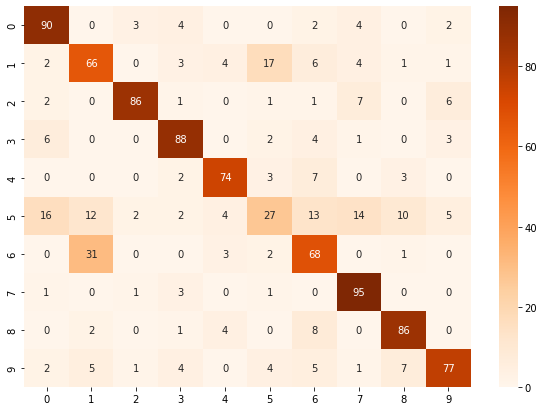

In [75]:
classes = ["0", "1", "2", "3","4","5","6","7","8","9"]
df_cfm = pd.DataFrame(arr, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, cmap='Oranges', fmt='g')
